##layers.Conv2D

In [ ]:
import tensorflow as tf
# The inputs are 28x28 RGB images with `channels_last` and the batch
# size is 4.
input_shape = (4, 28, 28, 3)      # (batch, height, width, color channel)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(filters=2, kernel_size=3, input_shape=input_shape)(x)
x.shape, y.shape, #x, y


(TensorShape([4, 28, 28, 3]), TensorShape([4, 26, 26, 2]))

In [ ]:
y.ndim, y.dtype

(4, tf.float32)

In [ ]:
# With `padding` as "same".
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(filters=5, kernel_size=(3,3), padding="same", activation='relu', input_shape=input_shape)(x)
print(y.shape)


(4, 28, 28, 5)


##layers.AveragePooling2D

In [ ]:
x = [[1., 2., 3., 4.],
                 [5., 6., 7., 8.],
                 [9., 10., 11., 12.]]
x = tf.reshape(x, [1, 3, 4, 1])
max_pool_2d = tf.keras.layers.AveragePooling2D(pool_size=(2, 2),
   strides=(1, 1), padding='valid')
max_pool_2d(x)

<tf.Tensor: shape=(1, 2, 3, 1), dtype=float32, numpy=
array([[[[3.5],
         [4.5],
         [5.5]],

        [[7.5],
         [8.5],
         [9.5]]]], dtype=float32)>

##layers.MaxPool2D

In [ ]:
x = tf.constant([[1., 2., 3., 4.],
                 [5., 6., 7., 8.],
                 [9., 10., 11., 12.]])
x = tf.reshape(x, [1, 3, 4, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
   strides=(1, 1), padding='valid')
max_pool_2d(x)

<tf.Tensor: shape=(1, 2, 3, 1), dtype=float32, numpy=
array([[[[ 6.],
         [ 7.],
         [ 8.]],

        [[10.],
         [11.],
         [12.]]]], dtype=float32)>

In [ ]:
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.],
                 [7., 8., 9.]])
x = tf.reshape(x, [1, 3, 3, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
   strides=(1, 1), padding='same')
max_pool_2d(x)

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[5.],
         [6.],
         [6.]],

        [[8.],
         [9.],
         [9.]],

        [[8.],
         [9.],
         [9.]]]], dtype=float32)>

##ImageDataGenerator()

In [1]:
import tensorflow as tf
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True, cache_dir='./')

68608000/68606236 [==============================] - 0s 0us/step


In [ ]:
path_to_zip

'./datasets/cats_and_dogs.zip'

###flow_from_directory(directory)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.6,
        zoom_range=0.6,
        rotation_range=90,
        horizontal_flip=True,
        vertical_flip=True)
train_generator = train_datagen.flow_from_directory(
        './datasets/cats_and_dogs_filtered/train',
        # './testdatasets',
        target_size=(150, 150),
        batch_size=32,
        # class_mode='binary'
        )

Found 1995 images belonging to 2 classes.


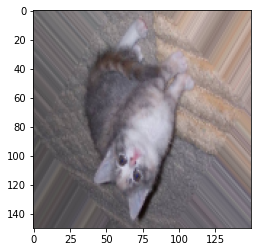

In [ ]:
x,y = train_generator.next()    # get batch_size by next()

import matplotlib.pyplot as plt
image = x[0]
plt.imshow(image)
# plt.show()

In [ ]:
x.shape, y.shape, len(y)

((32, 150, 150, 3), (32,), 32)

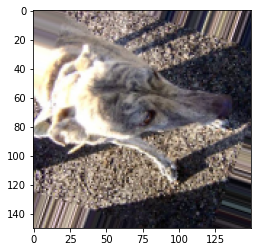

In [ ]:
import matplotlib.pyplot as plt
image = x[3]
plt.imshow(image)
plt.show()

### save file with generator

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.6,
        zoom_range=[0.1, 0.6],
        rotation_range=50,
        horizontal_flip=True,
        vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
        './source',
        target_size=(150, 150),
        batch_size=3, classes=['cats'],
        # class_mode='binary', shuffle=False, 
        save_to_dir='./target/cats', save_prefix='tmp', save_format='jpg'
        )

Found 3 images belonging to 1 classes.


In [ ]:
train_generator.next()

In [4]:
for i in range(5):
  train_generator.next()

In [ ]:
# len(train_generator)
gen = train_generator
print(gen, end=', ')


In [ ]:
i = 0
while 1:
  gen = train_generator.next()
  print(gen, end=', ')
  # train_generator.next()

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222

KeyboardInterrupt: ignored